In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
plt.rcParams['figure.dpi'] = 100

# Effect of electrical length setting of VNA on a measurement

Important: a cable adds a frequency dependent phase!

Cables result in a time delay $t_d = L / c$, where $L$ is the physical length of the cable (in meters) and $c$ is the speed of propgation of electromagnetic waves in the cable. 

A typical number for the cable phase velocity
* $1\times 10^8$ m/s
* = 10 ns /  meter 
* = 1 ns / 10 cm

For a signal coming into a cable $A \cos(\omega t)$, the signal coming out is:

$$
A \cos(\omega(t-t_d)) = A \cos (\omega t - \phi)
$$

where $\phi = \omega t_d$. 

We will start with an S11 trace with 3 resonances and add a phase delay from a cable. 

In [117]:
def plot_s11(d, S11, lim=1.05):
    plt.subplots(figsize=(12,6))
    plt.subplot(511)
    plt.plot(d,np.abs(S11))
    #plt.ylim((0,lim))
    plt.ylabel("$|S_{11}|$")
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.subplot(512)
    plt.plot(d,np.angle(S11)/np.pi*180)
    #plt.ylim((-190,190))
    plt.axhline(0,c='grey', ls=':')
    plt.ylabel("ph $S_{11}$ (deg)")
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.subplot(513)
    plt.plot(d,np.real(S11))
    #plt.ylim((-lim,lim))
    plt.axhline(0,c='grey', ls=':')
    plt.ylabel("$Re(S_{11})$")
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.subplot(514)
    plt.plot(d,np.imag(S11))
    #plt.ylim((-lim,lim))
    plt.axhline(0,c='grey', ls=':')
    plt.ylabel("$Im(S_{11})$")
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    plt.subplot(515)
    plt.plot(np.real(S11), np.imag(S11))
    plt.ylim((-lim,lim))
    plt.xlim((-8*lim,8*lim))
    plt.axhline(0,c='grey', ls=':')
    plt.axvline(0,c='grey', ls=':')
    #plt.tight_layout()

In [123]:
def res(f, f0, k, eta):
    return -eta*k/(-1j*(f-f0)+k/2)

f = np.linspace(4e9,8e9,10000)

# 1 ns 
td = 10e-9
S11 = 1
S11 += res(f,5e9,10e6,0.05)
S11 += res(f,6e9,10e6,0.2)
S11 += res(f,7e9,10e6,0.1)
S11 *= np.exp(-1j*td*2*np.pi*f)

The S11 magnitude looks reasonable, but the resonances in the others are harder to see due to the "running phase". Also, resonance circles in  complex plane don't even look like circles? 

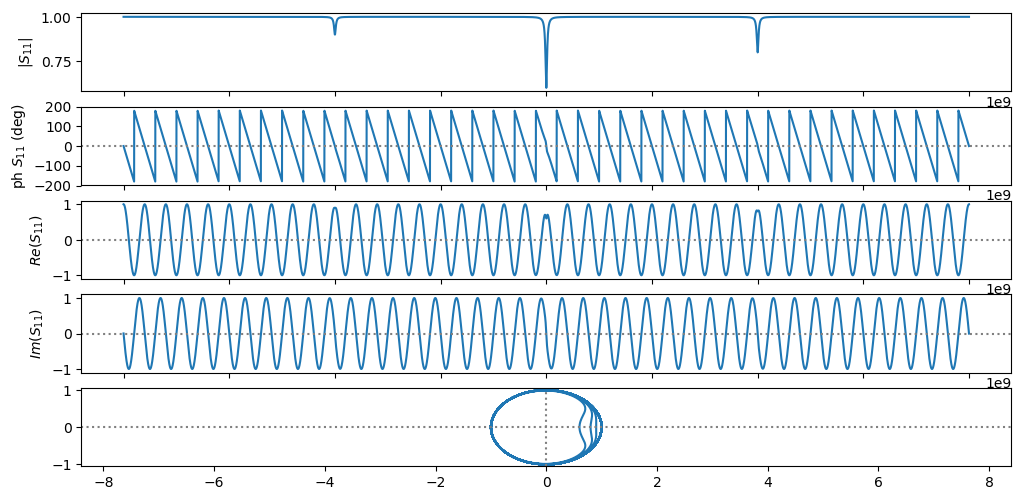

In [124]:
plot_s11(f,S11)

## Now make a widget to see what happens if you "unwind" the phase

This is equivalent to changing the position of the "reference plane" of the VNA

In [125]:
def update1(t=0):
    plot_s11(f,S11*np.exp(1j*f*2*np.pi*t*1e-9))
    
interact(update1, t=(-15,15,0.1))

interactive(children=(FloatSlider(value=0.0, description='t', max=15.0, min=-15.0), Output()), _dom_classes=('…

<function __main__.update1(t=0)>